## Bioinformatics

#### [User]

<span style="color:blue; font-size:20pt">
I want to learn about "3. Bioinformatics Libraries". Can you explain it with example codes?
</span>

#### [ChatGPT]

Certainly! Bioinformatics libraries in Python, such as Biopython and scikit-bio, provide tools and functions to handle biological data, including sequence analysis, structure analysis, and more. Here’s a brief introduction to these libraries with example codes.

### Biopython

Biopython is one of the most widely used libraries for bioinformatics in Python. It provides tools for reading and writing different bioinformatics file formats, performing sequence analysis, and interacting with biological databases.

#### Installation
```bash
pip install biopython
```



#### Sequence objects

In [2]:
from Bio.Seq import Seq
my_seq = Seq("AGTACACTGGT")
my_seq

Seq('AGTACACTGGT')

In [5]:
for index, letter in enumerate(my_seq):
    print("%i %s " % (index, letter))

0 A 
1 G 
2 T 
3 A 
4 C 
5 A 
6 C 
7 T 
8 G 
9 G 
10 T 


In [7]:
x = [1, 4, 5, 7, 8]
for i in enumerate(x):
    print(i)

for i in x:
    print(i)

(0, 1)
(1, 4)
(2, 5)
(3, 7)
(4, 8)
1
4
5
7
8


In [8]:
print(my_seq)
print(my_seq[0:3])
print(my_seq[0::2])
print(str(my_seq))
print(my_seq + "ATG")
print(my_seq=="ATG")
print("AGT" in my_seq)

AGTACACTGGT
AGT
ATCCGT
AGTACACTGGT
AGTACACTGGTATG
False
True


In [9]:
my_seq_low = my_seq.lower()
print(my_seq_low)
print(my_seq_low.upper())
print(my_seq.complement())
print(my_seq.reverse_complement())

agtacactggt
AGTACACTGGT
TCATGTGACCA
ACCAGTGTACT


* 전사, 번역

In [10]:
mrna = my_seq.transcribe()
print(mrna)
prot = mrna.translate() ## truncated 
print(prot) 
print(my_seq.translate())

AGUACACUGGU
STL
STL


/home/haseong/anaconda3/envs/biopy/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [ ]:
from Bio.Data import CodonTable
standard_table = CodonTable.unambiguous_dna_by_id[1]
print(standard_table)
print(standard_table.start_codons)
print(standard_table.stop_codons)
print(type(standard_table))

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

- MutableSeq objects

In [1]:
from Bio.Seq import Seq
my_seq = Seq("AGTACACTGGT")
my_seq[5] = "G"

TypeError: 'Seq' object does not support item assignment

In [5]:
from Bio.Seq import MutableSeq

mutable_seq = MutableSeq(my_seq)
mutable_seq

mutable_seq[5] = "G"
mutable_seq

new_seq = Seq(mutable_seq)
new_seq

Seq('AGTACGCTGGT')

- Finding subsequence

In [9]:
seq = Seq("GCCATTGTAATGGGCCGCTGAAAGGGTGCCCGA")
print(seq.index("ATG"))
print(seq.find("ATG"))
print(seq.find("AAAAA"))


9
9
-1


#### SeqRecord 

* Sequence annotation objects
* 특정 서열의 identifier나 feature 정보 포함

In [10]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

simple_seq = Seq("GATC")
simple_seq_r = SeqRecord(simple_seq)

In [13]:
help(SeqRecord)

Help on class SeqRecord in module Bio.SeqRecord:

class SeqRecord(builtins.object)
 |  SeqRecord(seq: Union[ForwardRef('Seq'), ForwardRef('MutableSeq'), NoneType], id: Optional[str] = '<unknown id>', name: str = '<unknown name>', description: str = '<unknown description>', dbxrefs: Optional[List[str]] = None, features: Optional[List[ForwardRef('SeqFeature')]] = None, annotations: Optional[Dict[str, Union[str, int]]] = None, letter_annotations: Optional[Dict[str, Sequence[Any]]] = None) -> None
 |  
 |  A SeqRecord object holds a sequence and information about it.
 |  
 |  Main attributes:
 |   - id          - Identifier such as a locus tag (string)
 |   - seq         - The sequence itself (Seq object or similar)
 |  
 |  Additional attributes:
 |   - name        - Sequence name, e.g. gene name (string)
 |   - description - Additional text (string)
 |   - dbxrefs     - List of database cross references (list of strings)
 |   - features    - Any (sub)features defined (list of SeqFeature 

- class 개념 이해 필요

In [17]:
simple_seq_r.id = "AC12345"
simple_seq_r.description = "Made up sequence I wish I could write a paper about"
print(simple_seq_r.description)
print(simple_seq_r.seq)

Made up sequence I wish I could write a paper about
GATC


- Read fasta file
- https://www.ncbi.nlm.nih.gov/nuccore/MW015936.1
- Zika virus isolate Zika virus/H.sapiens-tc/THA/2006/CVD_06-020, complete genome

In [32]:
from Bio import SeqIO
record = SeqIO.read("data/MW015936.gb", "gb")

In [33]:
print(record)
help(record)

ID: MW015936.1
Name: MW015936
Description: Zika virus isolate Zika virus/H.sapiens-tc/THA/2006/CVD_06-020, complete genome
Number of features: 17
/molecule_type=RNA
/topology=linear
/data_file_division=VRL
/date=12-OCT-2020
/accessions=['MW015936']
/sequence_version=1
/keywords=['']
/source=Zika virus
/organism=Zika virus
/taxonomy=['Viruses', 'Riboviria', 'Orthornavirae', 'Kitrinoviricota', 'Flasuviricetes', 'Amarillovirales', 'Flaviviridae', 'Orthoflavivirus', 'Orthoflavivirus zikaense']
/references=[Reference(title='Complete genome sequence of the Zika virus used for development of live-attenuated Zika virus strain', ...), Reference(title='Direct Submission', ...)]
/structured_comment=defaultdict(<class 'dict'>, {'Assembly-Data': {'Sequencing Technology': 'Sanger dideoxy sequencing'}})
Seq('AGTTGTTGATCTGTGTGAATCAGACTGCGACAGTTCGAGTTTGAAGCGAAAGCT...TCT')
Help on SeqRecord in module Bio.SeqRecord object:

class SeqRecord(builtins.object)
 |  SeqRecord(seq: Union[ForwardRef('Seq'), Forw

In [35]:
print(record.id)
print(record.name)
print(record.description)
print(record.seq)
print(record.features)

MW015936.1
MW015936
Zika virus isolate Zika virus/H.sapiens-tc/THA/2006/CVD_06-020, complete genome
AGTTGTTGATCTGTGTGAATCAGACTGCGACAGTTCGAGTTTGAAGCGAAAGCTAGCAACAGTATCAACAGGTTTTATTTTGGATTTGGAAACGAGAGTTTCTGGTCATGAAAAACCCAAAGAAGAAATCCGGAGGATTCCGGATTGTCAATATGCTAAAACGCGGAGTAGCCCGTGTGAGCCCCTTTGGGGGCTTGAAGAGGCTGCCAGCCGGACTTCTGCTGGGTCATGGGCCCATCAGGATGGTCTTGGCGATTCTAGCCTTTTTGAGATTCACGGCAATCAAGCCATCACTGGGTCTCATCAATAGATGGGGTTCAGTGGGGAAAAAAGAGGCTATGGAAATAATAAAGAAGTTCAAGAAAGATCTGGCTGCCATGCTGAGAATAATCAATGCTAGGAAGGAGAAGAAGAGACGAGGCACAGATACTAGTGTCGGAATTGTTGGCCTCCTGCTGACCACAGCCATGGCAGTGGAGGTCACTAGACGTGGGAGTGCATACTATATGTACTTGGACAGAAGTGATGCTGGGGAGGCCATATCTTTTCCAACCACACTGGGGATGAATAAGTGTTATATACAGATCATGGATCTTGGACACATGTGTGATGCCACCATGAGCTATGAATGCCCTATGCTGGATGAGGGGGTAGAACCAGATGACGTCGATTGTTGGTGCAACACGACGTCAACTTGGGTTGTGTACGGAACCTGCCACCACAAAAAAGGTGAAGCACGGAGATCTAGAAGAGCTGTGACGCTCCCCTCCCATTCCACTAGGAAGCTGCAAACGCGGTCGCAGACCTGGTTGGAATCAAGAGAATACACAAAGCACTTGATTAGAGTCGAAAATTGGATATTCAGGAACCCTGGCTTCGCGTTAGCAGCAGCTGCCATCG

In [39]:
print(len(record.seq))
list(record.features)

10807


[SeqFeature(SimpleLocation(ExactPosition(0), ExactPosition(10807), strand=1), type='source', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(107), ExactPosition(10379), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(107), ExactPosition(10379), strand=1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(107), ExactPosition(473), strand=1), type='mat_peptide', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(107), ExactPosition(419), strand=1), type='mat_peptide', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(473), ExactPosition(977), strand=1), type='mat_peptide', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(473), ExactPosition(752), strand=1), type='mat_peptide', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(752), ExactPosition(977), strand=1), type='mat_peptide', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(977), ExactPosition(2489), strand=1), type='mat_peptide

![alt text](images/zika-features.png)

- Slicing

In [47]:
print(record.features[0])
print(record.features[1])
print(record.features[2])


type: source
location: [0:10807](+)
qualifiers:
    Key: collection_date, Value: ['11-Aug-2006']
    Key: country, Value: ['Thailand']
    Key: db_xref, Value: ['taxon:64320']
    Key: host, Value: ['Homo sapiens']
    Key: isolate, Value: ['Zika virus/H.sapiens-tc/THA/2006/CVD_06-020']
    Key: isolation_source, Value: ['serum']
    Key: mol_type, Value: ['genomic RNA']
    Key: note, Value: ['Passage history:Toxorhynchites splendens mosquito (1 passage); Vero, African green monkey kidney cell (2 passages); Aedes albopictus C6/36 cell (1 passage); genotype: Asian']
    Key: organism, Value: ['Zika virus']

type: gene
location: [107:10379](+)
qualifiers:
    Key: gene, Value: ['POLY']

type: CDS
location: [107:10379](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: gene, Value: ['POLY']
    Key: product, Value: ['polyprotein']
    Key: protein_id, Value: ['QOF88708.1']
    Key: translation, Value: ['MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRMVLAILAFLRFTAIKPSLGLINRWGSVGKKEA

- extract sequence

In [56]:
record.features[2].extract(record.seq)

Seq('ATGAAAAACCCAAAGAAGAAATCCGGAGGATTCCGGATTGTCAATATGCTAAAA...TAA')

* 위치 탐색 in 활용

In [59]:
for feature in record.features:
    if 4350 in feature:
        print(f"type: {feature.type} start: {feature.location.start} end: {feature.location.end}")

type: source start: 0 end: 10807
type: gene start: 107 end: 10379
type: CDS start: 107 end: 10379
type: mat_peptide start: 4223 end: 4613


* 서열 위치로 직접 슬라이싱

In [60]:
sub_record = record[3000:5000]
print(sub_record)
print(len(sub_record))
print(len(sub_record.features))
print(sub_record.features[0])
print(sub_record.features[1])

ID: MW015936.1
Name: MW015936
Description: Zika virus isolate Zika virus/H.sapiens-tc/THA/2006/CVD_06-020, complete genome
Number of features: 2
/molecule_type=RNA
Seq('TTAGAGAAGATTATTCATTAGAGTGTGATCCAGCCGTCATTGGAACAGCCGCTA...GAC')
2000
2
type: mat_peptide
location: [545:1223](+)
qualifiers:
    Key: gene, Value: ['POLY']
    Key: product, Value: ['nonstructural protein NS2A']

type: mat_peptide
location: [1223:1613](+)
qualifiers:
    Key: gene, Value: ['POLY']
    Key: product, Value: ['nonstructural protein NS2B']



#### [User]

<span style="color:blue; font-size: 20">
I have a genbank file. I want extract all the features of "mat_peptide" type in the file and calculate their length. can you show me a python code?
</span>

#### [ChatGPT]


Certainly! You can use Biopython to read a GenBank file and extract features of a specific type, such as "mat_peptide". Here's how you can do it:

**Python Script**

Here is the Python script that extracts all "mat_peptide" features from a GenBank file and calculates their lengths:

```python
from Bio import SeqIO

# Function to extract mat_peptide features and calculate their lengths
def extract_mat_peptide_features(file_path):
    record = SeqIO.read(file_path, "genbank")
    mat_peptides = []

    for feature in record.features:
        if feature.type == "mat_peptide":
            start = feature.location.start.position
            end = feature.location.end.position
            length = end - start
            mat_peptides.append({
                "ID": feature.qualifiers.get("product", ["Unknown"])[0],
                "Start": start,
                "End": end,
                "Length": length
            })
    
    return mat_peptides

# Example usage
genbank_file = 'example.gb'  # Replace with your GenBank file path
mat_peptide_features = extract_mat_peptide_features(genbank_file)

# Print the results
for peptide in mat_peptide_features:
    print(f"ID: {peptide['ID']}, Start: {peptide['Start']}, End: {peptide['End']}, Length: {peptide['Length']} bp")
```

**Explanation**

1. **Import Libraries**: Import the necessary modules from Biopython.
2. **extract_mat_peptide_features Function**: This function reads the GenBank file, extracts features of type "mat_peptide", calculates their start and end positions, and determines their lengths.
3. **Example Usage**: Replace `'example.gb'` with the path to your GenBank file. The script will read the file, extract the "mat_peptide" features, and print their IDs, start and end positions, and lengths.

**Running the Script**

1. Save the script to a file, for example, `extract_mat_peptides.py`.
2. Ensure you have the GenBank file (e.g., `example.gb`) in the same directory.
3. Run the script from the command line:
   ```bash
   python extract_mat_peptides.py
   ```

This script will read the GenBank file, extract all "mat_peptide" features, calculate their lengths, and print the details. If you have any specific questions or need further assistance, feel free to ask!

In [75]:
from Bio import SeqIO

records = SeqIO.parse("data/MW015936.gb", "genbank")
for feature in record.features:
    if feature.type == "mat_peptide":
        print(feature.qualifiers["product"])
        print(feature.location.start, feature.location.end)

['anchored capsid protein C']
107 473
['capsid protein C']
107 419
['membrane glycoprotein precursor M']
473 977
['protein pr']
473 752
['membrane glycoprotein M']
752 977
['envelope protein E']
977 2489
['nonstructural protein NS1']
2489 3545
['nonstructural protein NS2A']
3545 4223
['nonstructural protein NS2B']
4223 4613
['nonstructural protein NS3']
4613 6464
['nonstructural protein NS4A']
6464 6845
['protein 2K']
6845 6914
['nonstructural protein NS4B']
6914 7667
['RNA-dependent RNA polymerase NS5']
7667 10376


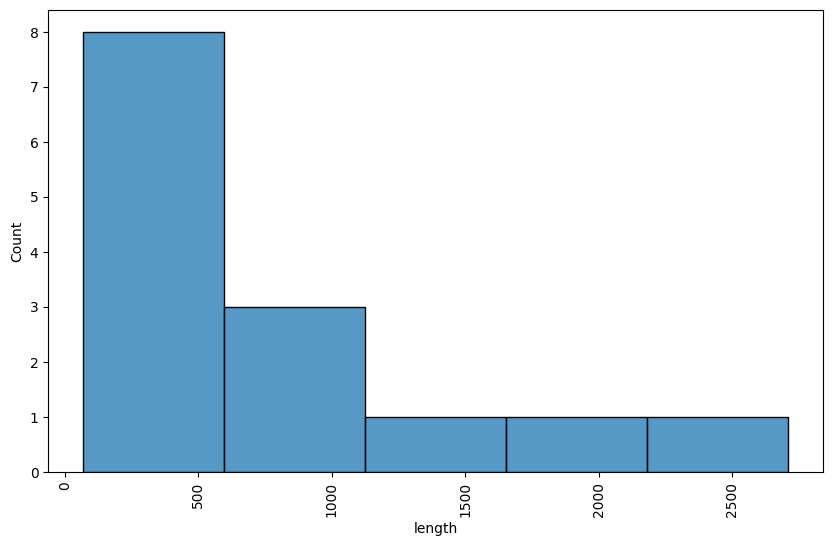

In [83]:
from Bio import SeqIO
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

mat_peptides = []
records = SeqIO.parse("data/MW015936.gb", "genbank")
for feature in record.features:
    if feature.type == "mat_peptide":
        mat_peptides.append({
            "id": feature.qualifiers["product"],
            "start": feature.location.start,
            "end": feature.location.end,
            "length": feature.location.end - feature.location.start
        })

df = pd.DataFrame(mat_peptides)

plt.figure(figsize = (10, 6))
# df["length"].hist()
sns.histplot(df["length"])
plt.xticks(rotation = 90)
plt.show()


#### Entrez

- 파일 읽기/쓰기 with 문 사용

In [ ]:
# Searching NCBI Nucleotide database
handle = Entrez.esearch(db="nucleotide", term="Homo sapiens[Organism] AND BRCA1[Gene]", retmax=5)
record = Entrez.read(handle)
print(record["IdList"])

* 여러개 record에 대해서는 parse 함수를 사용

In [ ]:
entids = "6273290,6273289"
with Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id=entids) as handle:
    for seq_record in SeqIO.parse(handle, "gb"):
        print("%s %s..." % (seq_record.id, seq_record.description[:50]))
        print("Sequence length %i, %i features, from: %s"
              % (len(seq_record), len(seq_record.features), seq_record.annotations["source"]))
        SeqIO.write(seq_record, "/content/drive/My Drive/Colab Notebooks/bioengml/datasets/"+seq_record.id+".gb", "gb")

AF191664.1 Opuntia clavata rpl16 gene; chloroplast gene for c...
Sequence length 899, 3 features, from: chloroplast Grusonia clavata
AF191663.1 Opuntia bradtiana rpl16 gene; chloroplast gene for...
Sequence length 899, 3 features, from: chloroplast Grusonia bradtiana


#### Multiple sequence alignment objects

* http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc70  
* Bio.AlignIO.read() returns a single MultipleSeqAlignment object  
* Bio.AlignIO.parse() returns MultipleSeqAlignment objects  

* Alignment tools 


In [ ]:
import Bio.Align.Applications as alnapps
dir(alnapps)

* Clustalw를 이용한 서열 정렬 (cactus family Opuntia(선인장))

In [ ]:
from Bio.Align.Applications import ClustalwCommandline as clw
#help(clw)
cline = clw("clustalw2", infile="/content/drive/My Drive/Colab Notebooks/bioengml/datasets/opuntia.fasta")
#stdout, stderr = cline()
print(cline)
#print(stdout)

clustalw2 -infile="/content/drive/My Drive/Colab Notebooks/bioengml/datasets/opuntia.fasta"


In [ ]:
#print(stdout)
from Bio import AlignIO
align = AlignIO.read("/content/drive/My Drive/Colab Notebooks/bioengml/datasets/opuntia.aln", "clustal")
print(align)

SingleLetterAlphabet() alignment with 7 rows and 906 columns
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273285|gb|AF191659.1|AF191
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273284|gb|AF191658.1|AF191
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273287|gb|AF191661.1|AF191
TATACATAAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273286|gb|AF191660.1|AF191
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273290|gb|AF191664.1|AF191
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273289|gb|AF191663.1|AF191
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273291|gb|AF191665.1|AF191


In [ ]:
from Bio import Phylo
tree = Phylo.read("/content/drive/My Drive/Colab Notebooks/bioengml/datasets/opuntia.dnd", "newick")
Phylo.draw_ascii(tree)

                             _______________ gi|6273291|gb|AF191665.1|AF191665
  __________________________|
 |                          |   ______ gi|6273290|gb|AF191664.1|AF191664
 |                          |__|
 |                             |_____ gi|6273289|gb|AF191663.1|AF191663
 |
_|_________________ gi|6273287|gb|AF191661.1|AF191661
 |
 |__________ gi|6273286|gb|AF191660.1|AF191660
 |
 |    __ gi|6273285|gb|AF191659.1|AF191659
 |___|
     | gi|6273284|gb|AF191658.1|AF191658



#### Position specific scoring matrix (PSSM) matrix

In [ ]:
from Bio.Seq import Seq
test_seq=Seq("TAAGCGTGCACGCGCAACACGTGCATTA")
test_seq    
print(test_seq)

TAAGCGTGCACGCGCAACACGTGCATTA


In [ ]:
from Bio import AlignIO
from Bio.Align import AlignInfo

* Pfam은 단백질 페밀리 database, 각 서열 그룹을 align 한 파일이 제공됨 
* Family: Sigma54_activ_2 (PF14532) https://pfam.xfam.org/family/PF14532#tabview=tab3

In [ ]:
align = AlignIO.read("/content/drive/My Drive/Colab Notebooks/bioengml/datasets/PF14532_full.txt", "stockholm")
#print(align)
print(len(align))
print(align[0])
print("########################################################")
print(align[0].seq)

1240
ID: A0A1F7TK17_9BACT/134-279
Name: A0A1F7TK17_9BACT
Description: A0A1F7TK17_9BACT/134-279
Number of features: 0
/accession=A0A1F7TK17.1
/start=134
/end=279
Seq('------------------------------------------------------...---', SingleLetterAlphabet())
########################################################
--------------------------------------------------------------------------------GNDPK-V-D-A-L-C-S-A---L---E---E---A---A--------G---D----L-------R--------P-----L---V-L-L--GER-GT-GK----R----H-L-A----H-----V--------L-------H--------N--------R--------G--------I--------T-------R--------E--------G-------P--------F----A----P----L--HCR---------S---------------LAspkrks----------------------------------dlqaslRR-L---LPK----------------------------E-----------------------GS-G---T--V-YL-DG--W--EQAP--A-EE-------RAG-I----L-D---A--LAA--------------------------------WT----K---D----G-----H---R--L-------L-V-A--I---D---E---D-G----G---E----------------A---V---S-L--W-D-Q-A-A-E-RL-R-A--R-KLHLPPL---------

* slicing alignment

In [ ]:
# print(align[3:8].format("clustal"))
print(align[3:8,100:200].format("clustal"))
print(align[3:8,197])

CLUSTAL X (1.81) multiple sequence alignment


V7EPJ0_9RHOB/141-283                --V---A---R---V---M--------N---T----D-------L-----
B1ZTM1_OPITP/145-296                --V---K---K---L---A--------A---V----R-------T-----
W3ANH6_9FIRM/219-355                --A---E---K---L---S--------R---T----D-------C-----
Q6LNI3_PHOPR/144-289                --I---A---N---I---A--------L---T----N-------K-----
A0A1G8U4Y5_9RHOB/145-284            --V---R---L---V---A--------R---A----G-------A-----

V7EPJ0_9RHOB/141-283                ---A-----V---L-V-T--GES-GT-GK----S----L-I-A----K--
B1ZTM1_OPITP/145-296                ---P-----V---L-L-I--GEN-GS-GK----S----A-V-A----E--
W3ANH6_9FIRM/219-355                ---P-----K---L-I-V--EPV-GN-LH----R----A-F-I----N--
Q6LNI3_PHOPR/144-289                ---D-----V---L-I-D--GES-GT-GR----R----T-V-S----K--
A0A1G8U4Y5_9RHOB/145-284            ---E-----V---L-V-T--GPT-GS-GT----A----K-V-A----E--



KENKE


* Turn the alignment object into an array of letters

In [ ]:
import numpy as np
from Bio import AlignIO
align = AlignIO.read("/content/drive/My Drive/Colab Notebooks/bioengml/datasets/opuntia.aln", "clustal")
align_array = np.array([list(rec) for rec in align], np.character)
print("Align shape %i by %i" % align_array.shape)
print(align_array)

Align shape 7 by 906
[[b'T' b'A' b'T' ... b'A' b'G' b'A']
 [b'T' b'A' b'T' ... b'A' b'G' b'A']
 [b'T' b'A' b'T' ... b'A' b'G' b'A']
 ...
 [b'T' b'A' b'T' ... b'A' b'G' b'A']
 [b'T' b'A' b'T' ... b'A' b'G' b'A']
 [b'T' b'A' b'T' ... b'A' b'G' b'A']]


Note that this leaves the original Biopython alignment object and the NumPy array in memory as separate objects - editing one will not update the other!

In [ ]:
align_array.shape

(7, 906)

* SummaryInfo 클래스
 * consensus sequence, position specific score matrix 계산
 * information content와 substitution 정보 계산 가능 

In [ ]:
summary_align = AlignInfo.SummaryInfo(align)
consensus = summary_align.dumb_consensus()
print(consensus)
my_pssm = summary_align.pos_specific_score_matrix(consensus, chars_to_ignore = ['N', '-'])
#print(my_pssm)
# your_pssm[sequence_number][residue_count_name]
my_pssm[1]['A']
[s for s in my_pssm][:10]

TATACATTAAAGXAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAAATGAATCTAAATGATATAXGATTCCACTATGTAAGGTCTTTGAATCATATCATAAAAGACAATGTAATAAAGCATGAATACAGATTCACACATAATTATCTGATATGAATCTATTCATAGAAAAAAGAAAAAAGTAAGAGCCTCCGGCCAATAAAGACTAAGAGGGTTGGCTCAAGAACAAAGTTCATTAAGAGCTCCATTGTAGAATTCAGACCTAATCATTAATCAAGAAGCGATGGGAACGATGTAATCCATGAATACAGAAGATTCAATTGAAAAAGATCCTAATXXXTCATTGGGAAGGATGGCGGAACGAACCAGAGACCAATTCATCTATTCTGAAAAGTGATAAACTAATCCTATAAAACTAAAATAGATATTGAAAGAGTAAATATTCGCCCGCGAAAATTCCTTTTTTATTTAAATTGCTCATATTTTXTTTTAGCAATGCAATCTAATAAAATATATCTATACAAAAAAAXATAGACAAACTATATATATATATATATATAATATATTTCAAATTXCCTTATATATCCAAATATAAAAATATCTAATAAATTAGATGAATATCAAAGAATCTATTGATTTAGTGTATTATTAAATGTATATXTTAATTCAATATTATTATTCTATTCATTTTTATTCATTTTCAAATTTATAATATATTAATCTATATATTAATTTAXAATTCTATTCTAATTCGAATTCAATTTTTAAATATTCATATTCAATTAAAATTGAAATTTTTTCATTCGCGAGGAGCCGGATGAGAAGAAACTCTCATGTCCGGTTCTGTAGTAGAGATGGAATTAAGAAAAAACCATCAACTATAACCCCAAXAGAACCAGA


[{'A': 0, 'C': 0, 'G': 0, 'T': 7.0},
 {'A': 7.0, 'C': 0, 'G': 0, 'T': 0},
 {'A': 0, 'C': 0, 'G': 0, 'T': 7.0},
 {'A': 7.0, 'C': 0, 'G': 0, 'T': 0},
 {'A': 0, 'C': 7.0, 'G': 0, 'T': 0},
 {'A': 7.0, 'C': 0, 'G': 0, 'T': 0},
 {'A': 0, 'C': 0, 'G': 0, 'T': 7.0},
 {'A': 1.0, 'C': 0, 'G': 0, 'T': 6.0},
 {'A': 7.0, 'C': 0, 'G': 0, 'T': 0},
 {'A': 7.0, 'C': 0, 'G': 0, 'T': 0}]

In [ ]:
instances = [al.seq for al in align[:10]]
print(instances)

[Seq('TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAA...AGA', SingleLetterAlphabet()), Seq('TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAA...AGA', SingleLetterAlphabet()), Seq('TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAA...AGA', SingleLetterAlphabet()), Seq('TATACATAAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAA...AGA', SingleLetterAlphabet()), Seq('TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAA...AGA', SingleLetterAlphabet()), Seq('TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAA...AGA', SingleLetterAlphabet()), Seq('TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAA...AGA', SingleLetterAlphabet())]


#### Motif

 * Bio.motifs package included in Biopython 1.61 

In [ ]:
from Bio import motifs
from Bio.Seq import Seq

In [ ]:
instances = [Seq("TACAA"),
            Seq("TACGA"),
            Seq("TACAA"),
            Seq("TAGAA"),
            Seq("TACAA"),
            Seq("AACGA"),
           ]

In [ ]:
m = motifs.create(instances)
print(m)

TACAA
TACGA
TACAA
TAGAA
TACAA
AACGA



In [ ]:
m.counts

{'A': [1, 6, 0, 4, 6],
 'C': [0, 0, 5, 0, 0],
 'G': [0, 0, 1, 2, 0],
 'T': [5, 0, 0, 0, 0]}

In [ ]:
m.counts["A", 1]
r = m.reverse_complement()
print(r.consensus)
#r.weblogo("mymotif.png")

TTGTA


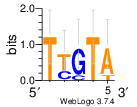

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/drive/My Drive/Colab Notebooks/bioengml/mymotif.png"))

* Position-weight matrices 계산
* .counts 특성 사용 

In [ ]:
pwm = m.counts.normalize(pseudocounts=0.5)
print(pwm)

        0      1      2      3      4
A:   0.19   0.81   0.06   0.56   0.81
C:   0.06   0.06   0.69   0.06   0.06
G:   0.06   0.06   0.19   0.31   0.06
T:   0.69   0.06   0.06   0.06   0.06



In [ ]:
pssm = pwm.log_odds()
print(pssm)

        0      1      2      3      4
A:  -0.42   1.70  -2.00   1.17   1.70
C:  -2.00  -2.00   1.46  -2.00  -2.00
G:  -2.00  -2.00  -0.42   0.32  -2.00
T:   1.46  -2.00  -2.00  -2.00  -2.00



In [ ]:
background = {"A":0.3,"C":0.2,"G":0.2,"T":0.3}
pssm = pwm.log_odds(background)
print(pssm)

        0      1      2      3      4
A:  -0.68   1.44  -2.26   0.91   1.44
C:  -1.68  -1.68   1.78  -1.68  -1.68
G:  -1.68  -1.68  -0.09   0.64  -1.68
T:   1.20  -2.26  -2.26  -2.26  -2.26



* 서열 내 모티프 존재 유무 탐색 

In [ ]:
test_seq=Seq("TACACTGCATTACAACCCAAGCATTA")
for pos, seq in m.instances.search(test_seq):
    print("%i %s " % (pos, seq))
print(m)

10 TACAA 
TACAA
TACGA
TACAA
TAGAA
TACAA
AACGA



In [ ]:
for pos, seq in r.instances.search(test_seq):
    print("%i %s " % (pos, seq))
print(r)

TTGTA
TCGTA
TTGTA
TTCTA
TTGTA
TCGTT



* Using the PSSM score

In [ ]:
for pos, score in pssm.search(test_seq, threshold=3.0):
    print("%d, %f " % (pos, score))
print(pssm.calculate(test_seq))

0, 3.643981 
10, 6.759458 
[  3.643981    -8.560285    -2.4004133   -5.6533937   -4.2748823
  -0.05645879 -10.145247    -3.3293302   -5.9753222   -3.5703382
   6.759458    -5.3903594   -5.8598447   -0.81545067  -0.81545067
   0.7695118   -6.3903594   -3.5379167    0.4255574   -1.9309279
 -10.145247    -3.3293302 ]


![](PWMScanning.png)

In [ ]:
m.pseudocounts = 0.1
print(m.counts)
print(m.pwm)
print(m.pssm)


        0      1      2      3      4
A:   1.00   6.00   0.00   4.00   6.00
C:   0.00   0.00   5.00   0.00   0.00
G:   0.00   0.00   1.00   2.00   0.00
T:   5.00   0.00   0.00   0.00   0.00

        0      1      2      3      4
A:   0.17   0.95   0.02   0.64   0.95
C:   0.02   0.02   0.80   0.02   0.02
G:   0.02   0.02   0.17   0.33   0.02
T:   0.80   0.02   0.02   0.02   0.02

        0      1      2      3      4
A:  -0.54   1.93  -4.00   1.36   1.93
C:  -4.00  -4.00   1.67  -4.00  -4.00
G:  -4.00  -4.00  -0.54   0.39  -4.00
T:   1.67  -4.00  -4.00  -4.00  -4.00



### scikit-bio

scikit-bio is another library focused on bioinformatics, providing functionalities for sequence analysis, alignment, phylogenetics, and more.

#### Installation
```bash
pip install scikit-bio
```

#### Basic Usage Examples

**Reading and Writing Sequence Files:**
```python
import skbio

# Reading a FASTA file
for seq in skbio.io.read("example.fasta", format="fasta"):
    print(seq.metadata['id'])
    print(seq)

# Writing to a FASTA file
sequences = [seq for seq in skbio.io.read("example.fasta", format="fasta")]
skbio.io.write(sequences, "output.fasta", format="fasta")
```

**Sequence Analysis:**
```python
from skbio import DNA, RNA, Protein

# Creating sequences
dna_seq = DNA("AGTACACTGGT")
rna_seq = dna_seq.transcribe()
protein_seq = dna_seq.translate()

print("DNA: ", dna_seq)
print("RNA: ", rna_seq)
print("Protein: ", protein_seq)
```

**Alignment:**
```python
from skbio import DNA
from skbio.alignment import local_pairwise_align_ssw

seq1 = DNA("ACTGCTAGCTAG")
seq2 = DNA("GCTAGCTAGGTA")

alignment, score, start_end_positions = local_pairwise_align_ssw(seq1, seq2)

print("Alignment:\n", alignment)
print("Score:", score)
print("Start-End Positions:", start_end_positions)
```

**Phylogenetic Tree Construction:**
```python
from skbio import DistanceMatrix
from skbio.tree import nj

# Example distance matrix
dm = DistanceMatrix([[0.0, 0.2, 0.4],
                     [0.2, 0.0, 0.6],
                     [0.4, 0.6, 0.0]],
                    ['A', 'B', 'C'])

# Constructing a phylogenetic tree using Neighbor-Joining
tree = nj(dm)
print(tree.ascii_art())
```

### Example: Analyzing a Protein Sequence

Let’s put together an example that reads a protein sequence from a GenBank file, performs some basic analysis using Biopython, and aligns it using scikit-bio.

```python
from Bio import SeqIO
from Bio.Seq import Seq
from skbio import Protein
from skbio.alignment import global_pairwise_align_protein

# Read a protein sequence from a GenBank file
record = SeqIO.read("example.gb", "genbank")
protein_seq = record.seq.translate()

print("Protein Sequence:", protein_seq)

# Perform reverse translation to get the DNA sequence
dna_seq = protein_seq.reverse_translate(table=11)
print("Reverse Translated DNA Sequence:", dna_seq)

# Perform alignment with another protein sequence
seq1 = Protein(str(protein_seq))
seq2 = Protein("MKVLYNLKDG")

alignment, score, start_end_positions = global_pairwise_align_protein(seq1, seq2)

print("Alignment:\n", alignment)
print("Score:", score)
print("Start-End Positions:", start_end_positions)
```

### Explanation:
- **Reading Sequence**: We use Biopython to read a protein sequence from a GenBank file.
- **Sequence Analysis**: We perform basic sequence operations like translation and reverse translation.
- **Alignment**: We use scikit-bio to perform a global pairwise alignment between two protein sequences.

By mastering these bioinformatics libraries, you will be well-equipped to handle a wide range of bioinformatics tasks and analyses in your research. If you have specific questions or need further examples, feel free to ask!